In [1]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import re
from sklearn.metrics import f1_score
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchsummary import summary
from tqdm import tqdm
import glob
import cv2
from skimage.color import rgb2gray


In [2]:
directory_path = 'QBAM_DNNS'

# Check if the directory exists
if os.path.exists(directory_path):
    # List contents of the directory
    directory_contents = os.listdir(directory_path)
    print(f"Contents of '{directory_path}':")
    for item in directory_contents:
        print(item)
else:
    print(f"The directory {directory_path} does not exist.")

Contents of 'QBAM_DNNS':
.DS_Store
Abs Test Images
Abs Train Images
Abs Test Label Images
Abs Train Label Images
Abs Train Label Images 3D


In [3]:
print(torch.__version__)
print(torch.version.cuda)

print("Is MPS even available?:", torch.backends.mps.is_available())
print("Is the current version of PyTorch built with MPS activated?:", torch.backends.mps.is_built())

2.2.0
None
Is MPS even available?: True
Is the current version of PyTorch built with MPS activated?: True


In [4]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print(f"Using {device} device")

Using mps device


In [5]:
train_dir_path = 'ABS_IMAGES/AbsImages_Segmented'
train_label_dir_path = 'ABS_IMAGES/QBAM'

train_count = 0
train_label_count = 0

for path in os.listdir(train_dir_path):
    if os.path.isfile(os.path.join(train_dir_path, path)):
        train_count += 1

for path in os.listdir(train_label_dir_path):
    if os.path.isfile(os.path.join(train_label_dir_path, path)):
        train_label_count += 1


print('Segmented images count:', train_count)
print('R,G,B images count:', train_label_count)


Segmented images count: 20
R,G,B images count: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


original (3026, 2716)
cropped (3024, 2715)
(3024, 2715)
All labels have been converted to 3D with three channels and saved as TIFF files.


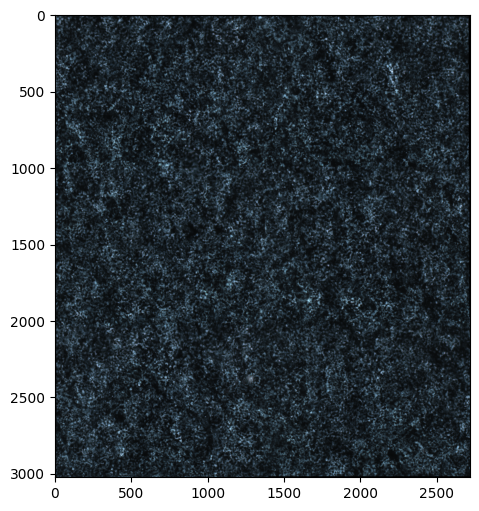

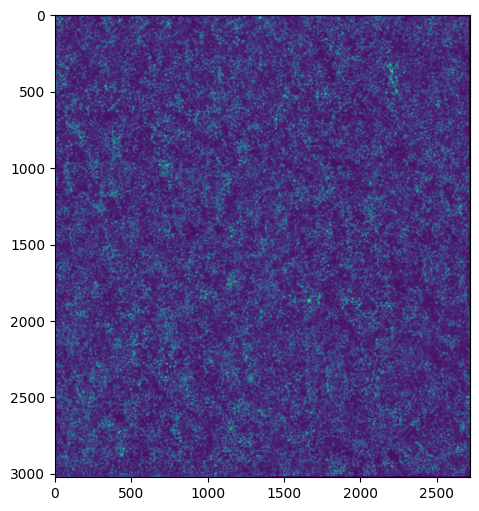

In [160]:
output_dir = 'ABS_IMAGES/'


os.makedirs(output_dir, exist_ok=True)

# label_files = glob.glob(os.path.join(train_label_dir_path, '*.tif'))


# for file_path in label_files:
#     label = Image.open(file_path)
#     label_array = np.array(label)

path = 'ABS_IMAGES/QBAM/segmented/AMD1CloneB-D75.tif'

path_r = 'ABS_IMAGES/QBAM/20161117-AMD1B-D75_Red_stitched-0.tif'
path_g = 'ABS_IMAGES/QBAM/20161117-AMD1B-D75_Green_stitched-0.tif'
path_b = 'ABS_IMAGES/QBAM/20161117-AMD1B-D75_Blue_stitched-0.tif'
output_path = 'AMD1B_D75_combined_rgb.tif'
output_path2 = 'AMD1B_D75_combined_rgb_to_gray.tif'
cropped_path =  'AMD1_CloneB_D75_cropped_seg.tif'


image_r = tiff.imread(path_r)
image_g = tiff.imread(path_g)
image_b = tiff.imread(path_b)

image_= tiff.imread(path)
rgb_image = np.stack((image_r, image_g, image_b), axis=-1)

tiff.imwrite(output_path, rgb_image)
image = tiff.imread(output_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)

image2 = rgb2gray(image)

print("original", image_.shape)
cropped = image_[:3024, :2715]
print("cropped", cropped.shape)
print(image2.shape)
tiff.imwrite(cropped_path, cropped)


tiff.imwrite(output_path2, image2)
plt.figure(figsize=(6, 6))
plt.imshow(image2)




print("All labels have been converted to 3D with three channels and saved as TIFF files.")


256x256

In [161]:
# seg_3d_path = 'QBAM_DNNS/Abs Train Label Images 3D/AMD1_Clone-A_D75_n990_r201_c1.tif'
# seg_2d_path = 'QBAM_DNNS/Abs Train Label Images/AMD1_Clone-A_D75_n990_r201_c1.tif'

# qbam_path = 'QBAM_DNNS/Abs Train Images/AMD1_Clone-A_D75_n990_r179_c13.tif'

# output_path = 'n990_rgb_to_gray.tif'


# image = tiff.imread(qbam_path)
# plt.figure(figsize=(6, 6))
# plt.imshow(image)

# image2 = rgb2gray(image)

# plt.figure(figsize=(6, 6))
# plt.imshow(image2)
# tiff.imwrite(output_path, image2)

# image3 = tiff.imread(seg_3d_path)
# plt.figure(figsize=(6, 6))
# plt.imshow(image3)

# image4 = tiff.imread(seg_2d_path)
# plt.figure(figsize=(6, 6))
# plt.imshow(image4)




In [166]:
from nyxus import Nyxus

nyx = Nyxus(["*ALL*"])
print(image2.shape, cropped.shape)


features = nyx.featurize(image2, cropped)
features.to_csv('out.csv', index=False)  


(3024, 2715) (3024, 2715)
